In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

In [7]:
# Get the current working directory
current_directory = os.getcwd()

# Go back one level to the parent directory
parent_directory = os.path.dirname(current_directory)

# Open a different folder
desired_folder = "processed_data"  
folder_path = os.path.join(parent_directory, desired_folder)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    file_to_read = "filtered_dataset_v2.csv" 
    file_path = os.path.join(folder_path, file_to_read)
    
    # Check if the file exists
    if os.path.exists(file_path) and os.path.isfile(file_path):
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error reading file: {e}")
    else:
        print(f"File '{file_to_read}' does not exist in folder '{desired_folder}'.")
else:
    print(f"Folder '{desired_folder}' does not exist in the parent directory.")

In [8]:
df.head()

,Unnamed: 0,Summary,Temperature (C),Apparent Temperature (C),Humidity,Pressure (millibars)
0,4,Mostly Cloudy,8.755556,6.977778,0.83,1016.51
1,5,Partly Cloudy,9.222222,7.111111,0.85,1016.66
2,12,Partly Cloudy,17.800000,17.800000,0.55,1017.59
3,14,Partly Cloudy,18.877778,18.877778,0.47,1017.17
4,18,Mostly Cloudy,14.255556,14.255556,0.69,1015.82


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38924 entries, 0 to 38923
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                38924 non-null  int64  
 1   Summary                   38924 non-null  object 
 2   Temperature (C)           38924 non-null  float64
 3   Apparent Temperature (C)  38924 non-null  float64
 4   Humidity                  38924 non-null  float64
 5   Pressure (millibars)      38924 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [10]:
df['Summary'].value_counts()

Summary
Mostly Cloudy    9731
Partly Cloudy    9731
Overcast         9731
Clear            9731
Name: count, dtype: int64

In [11]:
df.drop(columns=["Unnamed: 0"])

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Pressure (millibars)
0,Mostly Cloudy,8.755556,6.977778,0.83,1016.51
1,Partly Cloudy,9.222222,7.111111,0.85,1016.66
2,Partly Cloudy,17.800000,17.800000,0.55,1017.59
3,Partly Cloudy,18.877778,18.877778,0.47,1017.17
4,Mostly Cloudy,14.255556,14.255556,0.69,1015.82
...,...,...,...,...,...
38919,Clear,16.072222,16.072222,0.88,1015.25
38920,Partly Cloudy,28.866667,28.216667,0.37,1015.35
38921,Partly Cloudy,30.894444,29.450000,0.28,1014.66
38922,Partly Cloudy,30.766667,29.311111,0.28,1013.83


In [12]:
# feature_cols = ["Temperature (C)","Apparent Temperature (C)", "Humidity", "Pressure (millibars)"]
feature_cols = ["Temperature (C)", "Humidity", "Pressure (millibars)"]
encoder = LabelEncoder()
X = df[feature_cols]
Y = encoder.fit_transform(df.Summary)

In [13]:
# split X and y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [14]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train
# X_test_scaled = X_test

## Using Logistic Regression

In [63]:
lr = LogisticRegression(random_state=16,solver='lbfgs',max_iter=1000).fit(X_train_scaled, Y_train)

In [64]:
Y_pred = lr.predict(X_test_scaled)

In [65]:
from sklearn import metrics

cnf_matrix_lr = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix_lr

array([[1060,  201,  583,  613],
       [ 527,  414,  814,  627],
       [ 506,  277, 1587,  128],
       [ 538,  333,  516, 1007]], dtype=int64)

In [66]:
lr.score(X_test_scaled,Y_test)

0.4180454218477032

In [67]:
from sklearn.metrics import classification_report
# target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.40      0.43      0.42      2457
           1       0.34      0.17      0.23      2382
           2       0.45      0.64      0.53      2498
           3       0.42      0.42      0.42      2394

    accuracy                           0.42      9731
   macro avg       0.40      0.42      0.40      9731
weighted avg       0.41      0.42      0.40      9731



## Using SVC

One vs One Approach

In [68]:
svc = svm.SVC(decision_function_shape="ovo")
svc.fit(X_train_scaled, Y_train)

SVC(decision_function_shape='ovo')

In [69]:
Y_pred_svc = svc.predict(X_test_scaled)

cnf_matrix_svc = metrics.confusion_matrix(Y_test, Y_pred_svc)
cnf_matrix_svc

array([[1087,  260,  495,  615],
       [ 546,  488,  759,  589],
       [ 533,  297, 1558,  110],
       [ 568,  354,  473,  999]], dtype=int64)

In [70]:
svc.score(X_test_scaled,Y_test)

0.42462234097215085

In [71]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42      2457
           1       0.35      0.20      0.26      2382
           2       0.47      0.62      0.54      2498
           3       0.43      0.42      0.42      2394

    accuracy                           0.42      9731
   macro avg       0.41      0.42      0.41      9731
weighted avg       0.41      0.42      0.41      9731



One vs Rest Approach

In [72]:
lin_svc = svm.LinearSVC(dual="int").fit(X_train_scaled,Y_train)

InvalidParameterError: The 'dual' parameter of LinearSVC must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'int' instead.

In [ ]:
Y_pred_lin_svc = svc.predict(X_test_scaled)

cnf_matrix_lin_sv = metrics.confusion_matrix(Y_test, Y_pred_lin_svc)
cnf_matrix_lin_sv

In [ ]:
lin_svc.score(X_test_scaled, Y_test)

In [ ]:
print(classification_report(Y_test, Y_pred_lin_svc))

## Using KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4).fit(X_train_scaled,Y_train)

In [74]:
Y_pred_knn = knn.predict(X_test_scaled)

cnf_matrix_knn = metrics.confusion_matrix(Y_test, Y_pred_knn)
cnf_matrix_knn

array([[1162,  465,  372,  458],
       [ 603,  784,  522,  473],
       [ 523,  581, 1179,  215],
       [ 795,  571,  336,  692]], dtype=int64)

In [75]:
knn.score(X_test_scaled, Y_test)

0.3922515671565101

In [76]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      2457
           1       0.33      0.33      0.33      2382
           2       0.49      0.47      0.48      2498
           3       0.38      0.29      0.33      2394

    accuracy                           0.39      9731
   macro avg       0.39      0.39      0.39      9731
weighted avg       0.39      0.39      0.39      9731



## Using Gaussian Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train_scaled, Y_train)

In [78]:
Y_pred_gnb = gnb.predict(X_test_scaled)

cnf_matrix_gnb = metrics.confusion_matrix(Y_test, Y_pred_gnb)
cnf_matrix_knn

array([[1162,  465,  372,  458],
       [ 603,  784,  522,  473],
       [ 523,  581, 1179,  215],
       [ 795,  571,  336,  692]], dtype=int64)

In [79]:
gnb.score(X_test_scaled, Y_test)

0.39317644640838556

In [80]:
print(classification_report(Y_test, Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.40      0.18      0.25      2457
           1       0.30      0.16      0.21      2382
           2       0.40      0.78      0.53      2498
           3       0.42      0.43      0.43      2394

    accuracy                           0.39      9731
   macro avg       0.38      0.39      0.36      9731
weighted avg       0.38      0.39      0.36      9731



## Using Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, Y_train)

In [83]:
Y_pred_dt = dt.predict(X_test_scaled)

cnf_matrix_dt = metrics.confusion_matrix(Y_test, Y_pred_dt)
cnf_matrix_dt

array([[ 878,  541,  413,  625],
       [ 469,  718,  594,  601],
       [ 434,  574, 1083,  407],
       [ 593,  588,  389,  824]], dtype=int64)

In [84]:
dt.score(X_test_scaled, Y_test)

0.35998355770218887

In [85]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.37      0.36      0.36      2457
           1       0.30      0.30      0.30      2382
           2       0.44      0.43      0.44      2498
           3       0.34      0.34      0.34      2394

    accuracy                           0.36      9731
   macro avg       0.36      0.36      0.36      9731
weighted avg       0.36      0.36      0.36      9731



## Using Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0).fit(X_train_scaled, Y_train)

In [87]:
Y_pred_rf = rf.predict(X_test_scaled)

cnf_matrix_rf = metrics.confusion_matrix(Y_test, Y_pred_rf)
cnf_matrix_rf

array([[1040,  397,  409,  611],
       [ 443,  731,  625,  583],
       [ 355,  452, 1407,  284],
       [ 584,  519,  387,  904]], dtype=int64)

In [88]:
rf.score(X_test_scaled, Y_test)

0.41948412290617615

In [89]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.43      0.42      0.43      2457
           1       0.35      0.31      0.33      2382
           2       0.50      0.56      0.53      2498
           3       0.38      0.38      0.38      2394

    accuracy                           0.42      9731
   macro avg       0.41      0.42      0.41      9731
weighted avg       0.41      0.42      0.42      9731



## Using Deep Learning Methods

### ANN

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
# Hyperparameters for ANN 
num_classes = 4
epochs = 150
input_dimension = X_train.shape[1]
batch_size = 64
learning_rate = 0.001

In [17]:
Y_train

array([2, 0, 2, ..., 1, 3, 2])

In [18]:
y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

In [19]:
y_train_encoded

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [20]:
x_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
x_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

In [21]:
# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90) and (logs.get('accuracy')>0.95):
            print("\nValidation and training accuracies are high so cancelling training!")
            self.model.stop_training = True

##### Feed Forward Neural Network

In [22]:
# Architecture 1: 64-64-128-3 Feed Forward Neural Network
# Defining the ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=input_dimension)) 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Stopping early to avoid overfitting
stop_callback = myCallback()

In [23]:
# Training
history = model.fit(x_train_reshaped, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test_reshaped, y_test_encoded), callbacks=[stop_callback])

Epoch 1/150
457/457 [==============================] - 4s 4ms/step - loss: 1.2605 - accuracy: 0.4053 - val_loss: 1.2443 - val_accuracy: 0.4247
Epoch 2/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2465 - accuracy: 0.4154 - val_loss: 1.2429 - val_accuracy: 0.4259
Epoch 3/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2428 - accuracy: 0.4189 - val_loss: 1.2403 - val_accuracy: 0.4295
Epoch 4/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2404 - accuracy: 0.4218 - val_loss: 1.2380 - val_accuracy: 0.4270
Epoch 5/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2386 - accuracy: 0.4252 - val_loss: 1.2386 - val_accuracy: 0.4304
Epoch 6/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2360 - accuracy: 0.4276 - val_loss: 1.2374 - val_accuracy: 0.4303
Epoch 7/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2343 - accuracy: 0.4246 - val_loss: 1.2399 - val_accuracy: 0.4278

Epoch 58/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2052 - accuracy: 0.4443 - val_loss: 1.2255 - val_accuracy: 0.4351
Epoch 59/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2047 - accuracy: 0.4443 - val_loss: 1.2244 - val_accuracy: 0.4372
Epoch 60/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2050 - accuracy: 0.4426 - val_loss: 1.2241 - val_accuracy: 0.4338
Epoch 61/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2043 - accuracy: 0.4451 - val_loss: 1.2256 - val_accuracy: 0.4357
Epoch 62/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2026 - accuracy: 0.4449 - val_loss: 1.2266 - val_accuracy: 0.4347
Epoch 63/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2032 - accuracy: 0.4424 - val_loss: 1.2243 - val_accuracy: 0.4344
Epoch 64/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2016 - accuracy: 0.4464 - val_loss: 1.2289 - val_accuracy:

Epoch 115/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1864 - accuracy: 0.4537 - val_loss: 1.2245 - val_accuracy: 0.4333
Epoch 116/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1877 - accuracy: 0.4563 - val_loss: 1.2235 - val_accuracy: 0.4341
Epoch 117/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1873 - accuracy: 0.4546 - val_loss: 1.2230 - val_accuracy: 0.4367
Epoch 118/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1876 - accuracy: 0.4544 - val_loss: 1.2236 - val_accuracy: 0.4344
Epoch 119/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1860 - accuracy: 0.4525 - val_loss: 1.2232 - val_accuracy: 0.4387
Epoch 120/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1866 - accuracy: 0.4561 - val_loss: 1.2283 - val_accuracy: 0.4361
Epoch 121/150
457/457 [==============================] - 2s 4ms/step - loss: 1.1853 - accuracy: 0.4553 - val_loss: 1.2261 - val_ac

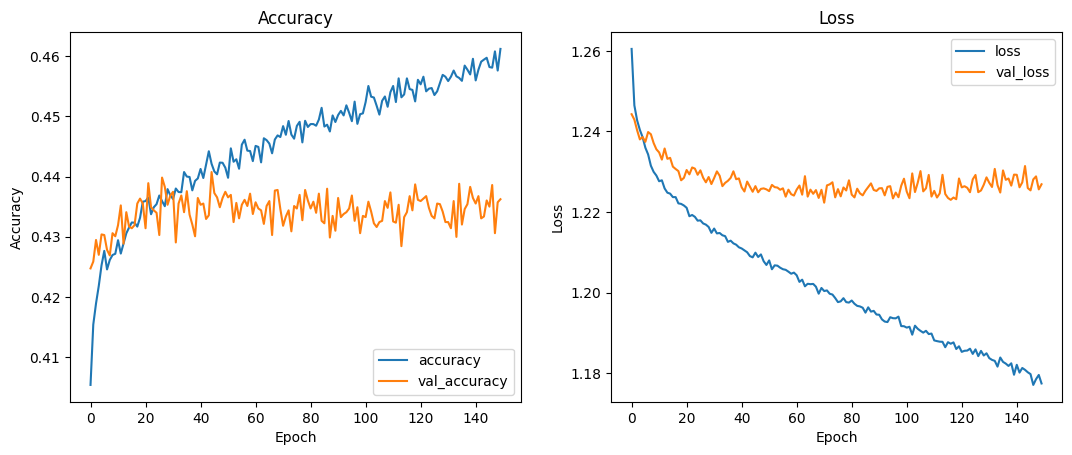

In [26]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

Epoch 1/150
457/457 [==============================] - 2s 4ms/step - loss: 1.3936 - accuracy: 0.2310 - val_loss: 1.3739 - val_accuracy: 0.3386
Epoch 2/150
457/457 [==============================] - 1s 3ms/step - loss: 1.3642 - accuracy: 0.3351 - val_loss: 1.3503 - val_accuracy: 0.3802
Epoch 3/150
457/457 [==============================] - 2s 3ms/step - loss: 1.3436 - accuracy: 0.3722 - val_loss: 1.3323 - val_accuracy: 0.3887
Epoch 4/150
457/457 [==============================] - 1s 3ms/step - loss: 1.3280 - accuracy: 0.3834 - val_loss: 1.3182 - val_accuracy: 0.3923
Epoch 5/150
457/457 [==============================] - 1s 3ms/step - loss: 1.3144 - accuracy: 0.3881 - val_loss: 1.3067 - val_accuracy: 0.3925
Epoch 6/150
457/457 [==============================] - 1s 3ms/step - loss: 1.3050 - accuracy: 0.3917 - val_loss: 1.2974 - val_accuracy: 0.3969
Epoch 7/150
457/457 [==============================] - 1s 3ms/step - loss: 1.2960 - accuracy: 0.3928 - val_loss: 1.2898 - val_accuracy: 0.3983

Epoch 58/150
457/457 [==============================] - 1s 3ms/step - loss: 1.2489 - accuracy: 0.4143 - val_loss: 1.2463 - val_accuracy: 0.4264
Epoch 59/150
457/457 [==============================] - 1s 3ms/step - loss: 1.2495 - accuracy: 0.4138 - val_loss: 1.2463 - val_accuracy: 0.4261
Epoch 60/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2492 - accuracy: 0.4147 - val_loss: 1.2462 - val_accuracy: 0.4255
Epoch 61/150
457/457 [==============================] - 2s 4ms/step - loss: 1.2495 - accuracy: 0.4142 - val_loss: 1.2461 - val_accuracy: 0.4258
Epoch 62/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2485 - accuracy: 0.4129 - val_loss: 1.2460 - val_accuracy: 0.4256
Epoch 63/150
457/457 [==============================] - 1s 3ms/step - loss: 1.2493 - accuracy: 0.4139 - val_loss: 1.2460 - val_accuracy: 0.4262
Epoch 64/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2489 - accuracy: 0.4142 - val_loss: 1.2459 - val_accuracy:

Epoch 115/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2450 - accuracy: 0.4171 - val_loss: 1.2438 - val_accuracy: 0.4248
Epoch 116/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2449 - accuracy: 0.4156 - val_loss: 1.2438 - val_accuracy: 0.4249
Epoch 117/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2462 - accuracy: 0.4166 - val_loss: 1.2438 - val_accuracy: 0.4249
Epoch 118/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2451 - accuracy: 0.4173 - val_loss: 1.2438 - val_accuracy: 0.4242
Epoch 119/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2447 - accuracy: 0.4176 - val_loss: 1.2437 - val_accuracy: 0.4248
Epoch 120/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2454 - accuracy: 0.4163 - val_loss: 1.2437 - val_accuracy: 0.4243
Epoch 121/150
457/457 [==============================] - 2s 3ms/step - loss: 1.2448 - accuracy: 0.4160 - val_loss: 1.2437 - val_ac

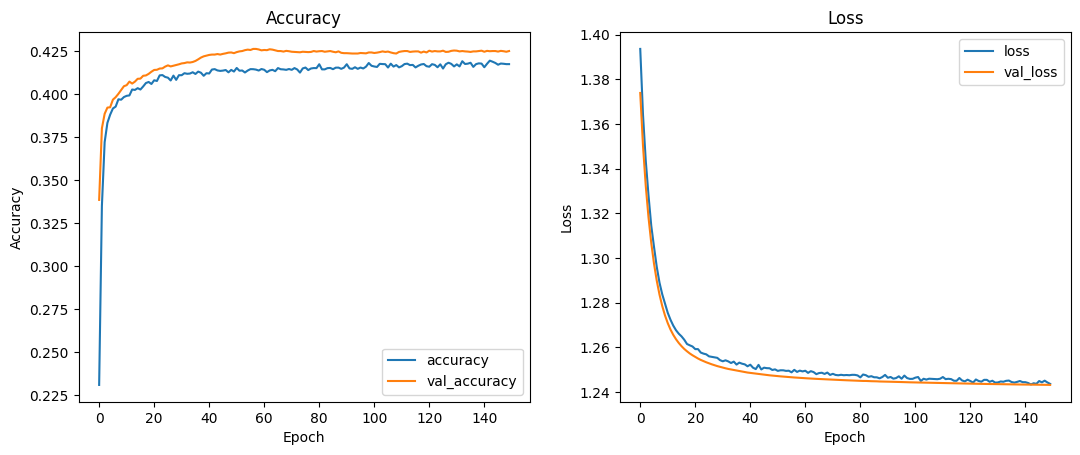

In [28]:
# Architecture 2: 32-256-3 Feed Forward Neural Network with 'relu' and 'softmax'
# Defining the ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=input_dimension)) 
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train_reshaped, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test_reshaped, y_test_encoded), callbacks=[stop_callback])

# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [30]:
test_loss_1, test_accuracy_1 = model.evaluate(x_test_reshaped, y_test_encoded, verbose=0)
print('Test Loss:', test_loss_1)
print('Test Accuracy:', test_accuracy_1)

Test Loss: 1.243097186088562
Test Accuracy: 0.42513614892959595


In [31]:
# Architecture 3: 32-256-3 Feed Forward Neural Network with 'sigmoid' and 'softmax'
# Defining the ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_dim=input_dimension)) 
model.add(tf.keras.layers.Dense(256, activation='sigmoid')) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train_reshaped, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test_reshaped, y_test_encoded), callbacks=[stop_callback])

# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

Epoch 1/150
457/457 [==============================] - 2s 4ms/step - loss: 1.4340 - accuracy: 0.2547 - val_loss: 1.3845 - val_accuracy: 0.3075
Epoch 2/150
457/457 [==============================] - 2s 4ms/step - loss: 1.4317 - accuracy: 0.2491 - val_loss: 1.3839 - val_accuracy: 0.2309
Epoch 3/150
457/457 [==============================] - 2s 3ms/step - loss: 1.4304 - accuracy: 0.2514 - val_loss: 1.3830 - val_accuracy: 0.2936
Epoch 4/150
457/457 [==============================] - 2s 3ms/step - loss: 1.4252 - accuracy: 0.2570 - val_loss: 1.3824 - val_accuracy: 0.3207
Epoch 5/150
457/457 [==============================] - 2s 3ms/step - loss: 1.4257 - accuracy: 0.2510 - val_loss: 1.3819 - val_accuracy: 0.2489
Epoch 6/150
457/457 [==============================] - 1s 3ms/step - loss: 1.4209 - accuracy: 0.2615 - val_loss: 1.3815 - val_accuracy: 0.2721
Epoch 7/150
457/457 [==============================] - 2s 3ms/step - loss: 1.4236 - accuracy: 0.2558 - val_loss: 1.3799 - val_accuracy: 0.3693

KeyboardInterrupt: 

##### RNN

Epoch 1/150
457/457 [==============================] - 4s 8ms/step - loss: 1.2611 - accuracy: 0.4045 - val_loss: 1.2439 - val_accuracy: 0.4270
Epoch 2/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2466 - accuracy: 0.4147 - val_loss: 1.2466 - val_accuracy: 0.4240
Epoch 3/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2424 - accuracy: 0.4198 - val_loss: 1.2400 - val_accuracy: 0.4259
Epoch 4/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2407 - accuracy: 0.4242 - val_loss: 1.2415 - val_accuracy: 0.4248
Epoch 5/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2386 - accuracy: 0.4221 - val_loss: 1.2380 - val_accuracy: 0.4292
Epoch 6/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2366 - accuracy: 0.4234 - val_loss: 1.2417 - val_accuracy: 0.4283
Epoch 7/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2343 - accuracy: 0.4254 - val_loss: 1.2431 - val_accuracy: 0.4243

Epoch 58/150
457/457 [==============================] - 4s 8ms/step - loss: 1.2004 - accuracy: 0.4485 - val_loss: 1.2293 - val_accuracy: 0.4378
Epoch 59/150
457/457 [==============================] - 3s 7ms/step - loss: 1.2006 - accuracy: 0.4485 - val_loss: 1.2302 - val_accuracy: 0.4385
Epoch 60/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1999 - accuracy: 0.4461 - val_loss: 1.2278 - val_accuracy: 0.4370
Epoch 61/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1993 - accuracy: 0.4491 - val_loss: 1.2291 - val_accuracy: 0.4365
Epoch 62/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1995 - accuracy: 0.4467 - val_loss: 1.2312 - val_accuracy: 0.4380
Epoch 63/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1990 - accuracy: 0.4488 - val_loss: 1.2290 - val_accuracy: 0.4349
Epoch 64/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1990 - accuracy: 0.4483 - val_loss: 1.2276 - val_accuracy:

Epoch 115/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1791 - accuracy: 0.4598 - val_loss: 1.2369 - val_accuracy: 0.4297
Epoch 116/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1794 - accuracy: 0.4595 - val_loss: 1.2311 - val_accuracy: 0.4404
Epoch 117/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1789 - accuracy: 0.4602 - val_loss: 1.2360 - val_accuracy: 0.4325
Epoch 118/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1801 - accuracy: 0.4571 - val_loss: 1.2309 - val_accuracy: 0.4370
Epoch 119/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1779 - accuracy: 0.4596 - val_loss: 1.2313 - val_accuracy: 0.4327
Epoch 120/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1789 - accuracy: 0.4594 - val_loss: 1.2317 - val_accuracy: 0.4322
Epoch 121/150
457/457 [==============================] - 3s 7ms/step - loss: 1.1770 - accuracy: 0.4596 - val_loss: 1.2344 - val_ac

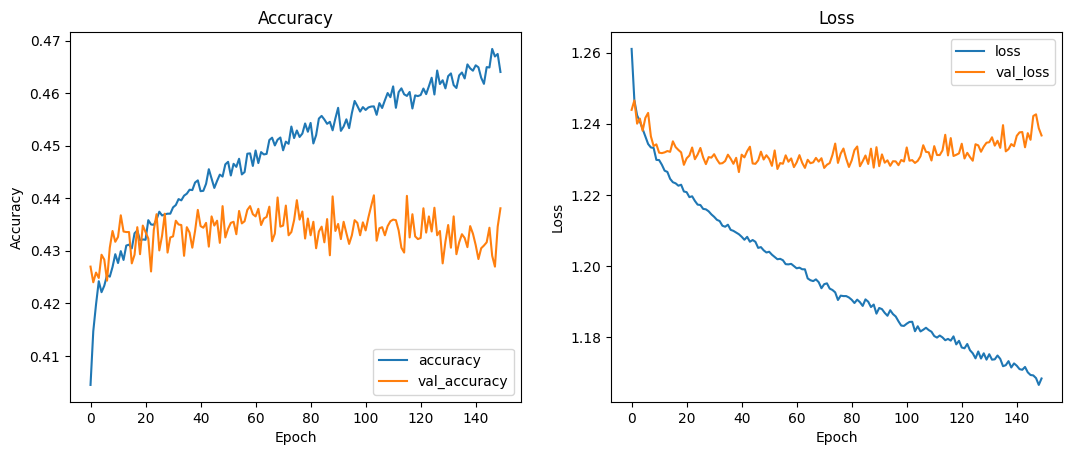

In [32]:
# Architecture 1: 32-64-128-3 RNN with 'relu' and 'softmax'
# Defining the RNN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=(input_dimension, 1)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train_reshaped, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test_reshaped, y_test_encoded), callbacks=[stop_callback])

# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [33]:
test_loss_5, test_accuracy_5 = model.evaluate(x_test_reshaped, y_test_encoded, verbose=0)
print('Test Loss:', test_loss_5)
print('Test Accuracy:', test_accuracy_5)

Test Loss: 1.236714482307434
Test Accuracy: 0.4380844831466675
